# Object / text detection module

## Object detection with YOLOv2

### (Optional) Creation of the official darknet YOLOv2 pretrained model

`darknet` is the original framework created by the authors of YOLOv2, with several pre-trained weights available on [their website](https://pjreddie.com/darknet/yolov2/). You can download these weights as initialization for inference or fine-tuning on your own datasets!

The default version accepts a 416x416 input image, so ensure you select the appropriate weights or adapt the model architecture accordingly. Links to pre-trained weights for both `COCO` and `Pascal VOC` datasets are provided in the `README` file. Simply download the weights and place them in your current directory. 

For convenience, the `from_darknet_pretrained` method will automatically download the weights for the `COCO` pre-trained model if the `weight_path` (1st argument) ends with `yolov2.weights`! You can simply execute the cell below and it will handle both downloading and building the model.

Note: The `Pascal VOC` pre-trained model may not work correctly in some configurations. However, this isn't problematic since the `COCO` pre-trained model is trained on 80 classes which include all 20 classes from `Pascal VOC`. Therefore, you can simply use the `COCO` pre-trained model for best results!

In [1]:
from models.detection.yolo import YOLO, COCO_CONFIG, VOC_CONFIG

coco_model = YOLO.from_darknet_pretrained('yolov2.weights', name = 'yolo_coco', ** COCO_CONFIG)
print(coco_model)
#voc_model  = YOLO.build_from_darknet('yolov2-voc.weights', nom = 'yolo_voc', ** VOC_CONFIG)

2025-03-16 10:00:39.472048: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 10:00:39.479711: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742115639.488721    7737 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742115639.491328    7737 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-16 10:00:39.500484: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Weight file pretrained_models/pretrained_weights/yolo_backend/full_yolo_backend.h5 does not exist !
Save model weights to `pretrained_models/yolo_coco/saving/ckpt-0000.weights.h5`
YOLO `yolo_coco` initialized successfully !
Save model weights to `pretrained_models/yolo_coco/saving/ckpt-0001.weights.h5`

========== yolo_coco ==========
Model :
- Inputs 	: (None, 416, 416, 3)
- Outputs 	: (None, 13, 13, 5, 85)
- Number of layers 	: 76
- Number of parameters 	: 50.984 Millions
- Model not compiled yet

Transfer-learning from : yolov2.weights
Already trained on 0 epochs (0 steps)

- Image size : (416, 416, 3)
- Normalization schema : None
- Labels (n = 80) : ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', ...]
- Feature extractor : FullYolo



### Object detection

The `detect` function takes any kind of supported image formats (gif, png or jpg), or even video formats, and detects objects on each provided image(s) ! Multiple configurations can be provided to save results, extract / show individual boxes, ... Check the `YOLO.predict` method for a complete overview ;)

The streaming API achieves between 35 fps when using the `JAX` backend on my `RTX3080 Max-Q laptop GPU`, which is quite funny and impressive !

The `obj_threshold` argument represents the minimal score required to detect the object. The lower it is, the more object you will detect but with more mistakes (aka *false positives*).

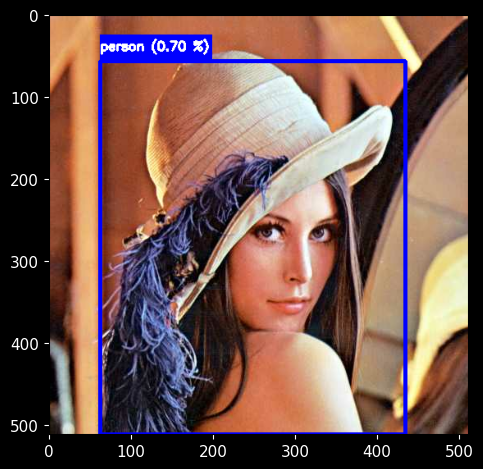

Result keys : ('filename', 'boxes', 'image', 'output', 'detected')


In [2]:
from models.detection import detect

result = detect('lena.jpg', save = False, model = 'yolo_coco', obj_threshold = 0.5, color = 'b')[0]
print('Result keys : {}'.format(tuple(result.keys())))

In [ ]:
from models.detection import stream

stream(model = 'yolo_coco', max_time = 15)

### Test pretrained YOLOv2 model on its dataset

For this test, you need the `COCO` / `VOC` dataset installed. It is just an example, you do not have to reproduce it ;)

Note : the `VOC` dataset is used because it is faster to load and contains a subset of `COCO`'s classes.

Loading dataset voc...
8 boxes found :
[0.53846985 0.04695898 0.67709273 0.18640083]
[0.5897482  0.18421216 0.75213724 0.30201137]
[0.41804254 0.27619302 0.59367514 0.42204726]
[0.6758878  0.29093328 0.8826817  0.428955  ]
[0.48273635 0.41267267 0.6691209  0.53736514]
[0.50251323 0.5571691  0.69641834 0.6977149 ]
[0.31667662 0.65745664 0.51100194 0.82247984]
[0.3473714  0.80704033 0.54128164 0.955261  ]


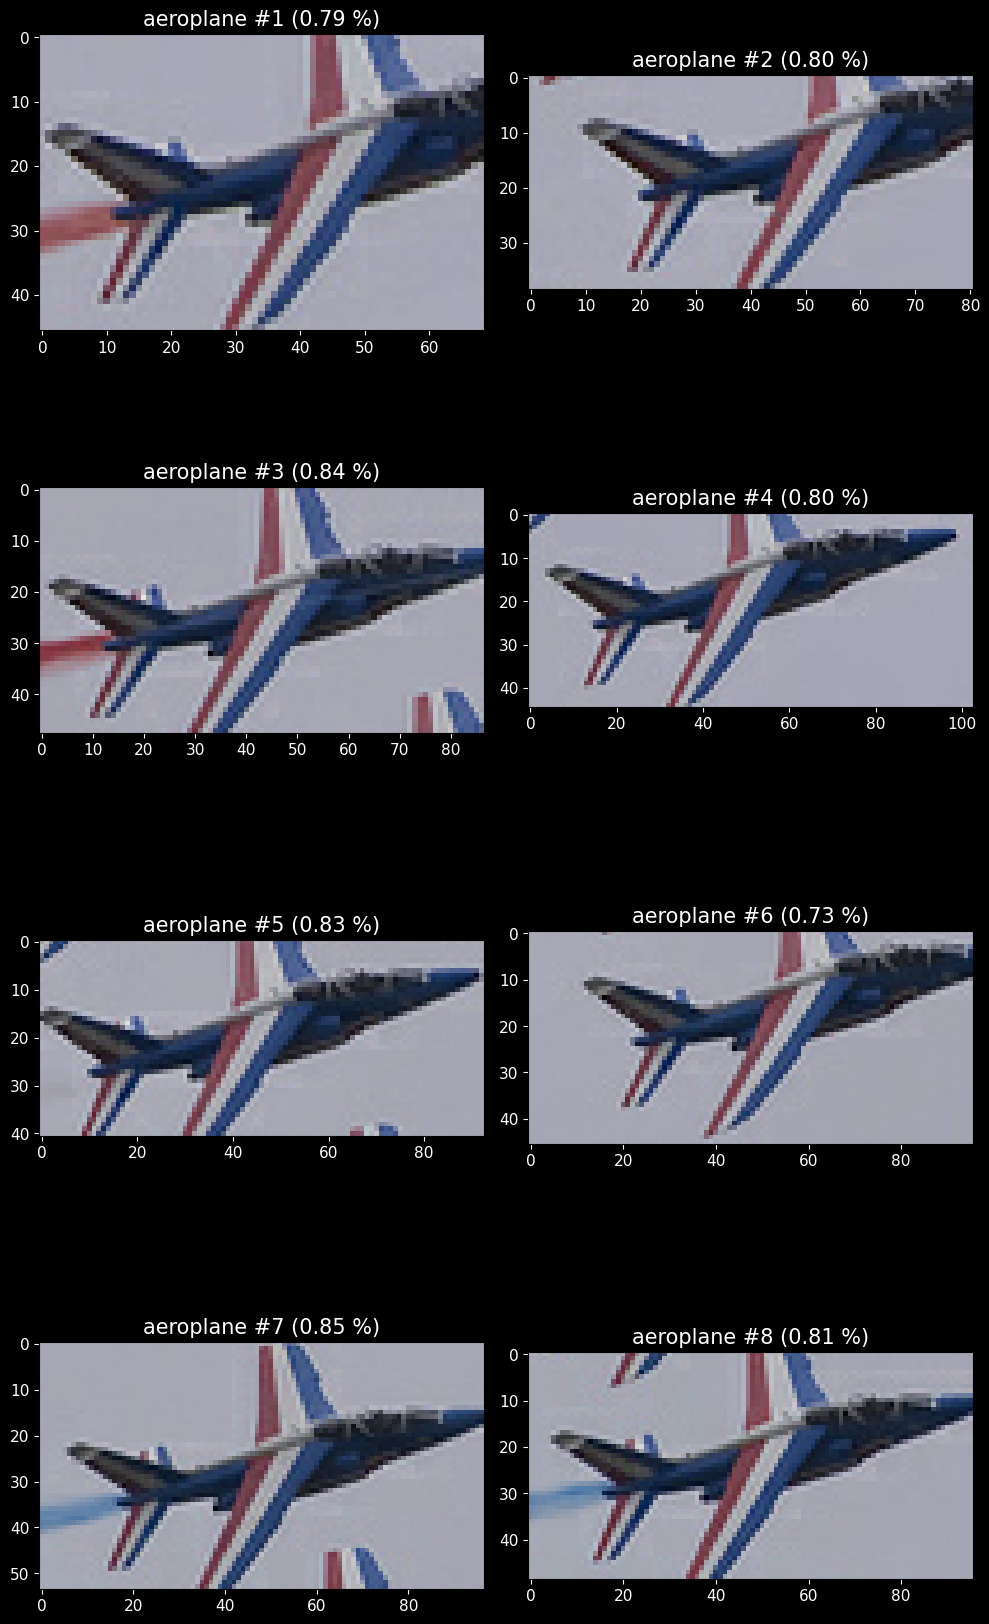

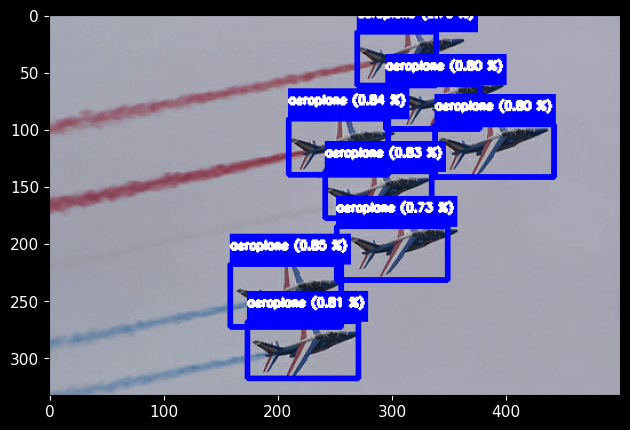

1 boxes found :
[0.0600957  0.24586262 0.9692615  0.5980157 ]


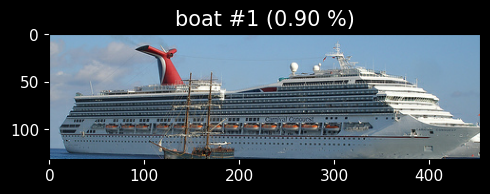

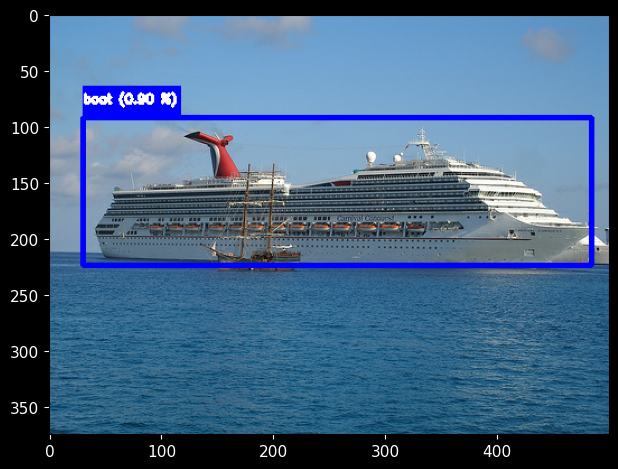

4 boxes found :
[0.1611546  0.14652476 0.8387095  1.        ]
[0.45131636 0.05005231 0.6494427  0.824322  ]
[0.02454689 0.47110528 0.22468135 0.9597661 ]
[0.12130493 0.5918824  0.14409372 0.72697777]


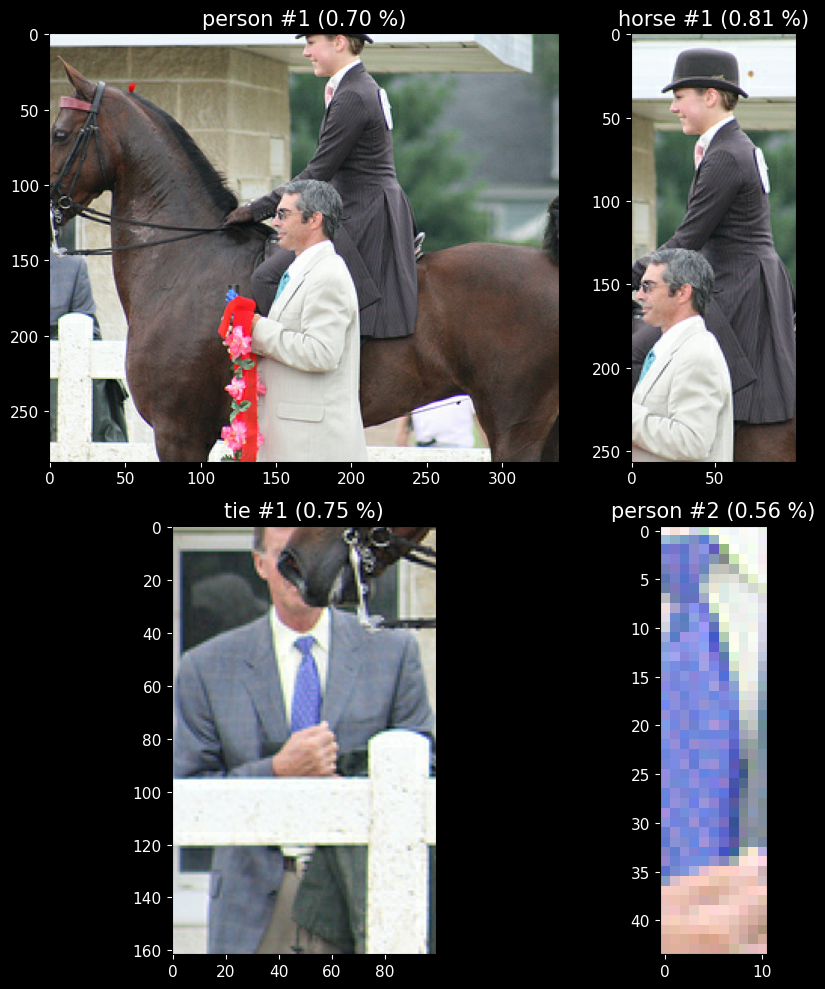

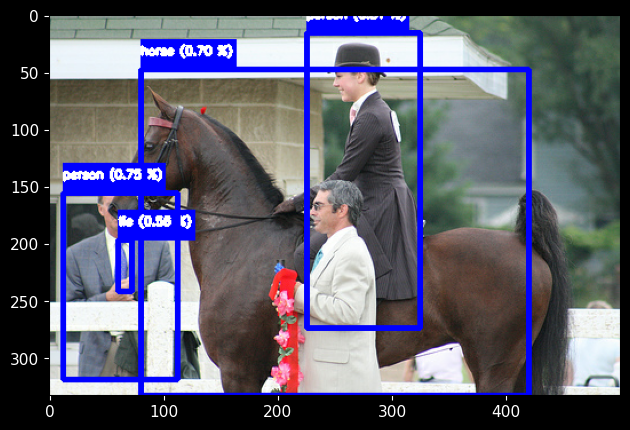

2 boxes found :
[0.10047363 0.35322875 0.5535988  0.9898158 ]
[0.45800337 0.49016523 0.67838883 0.9771869 ]


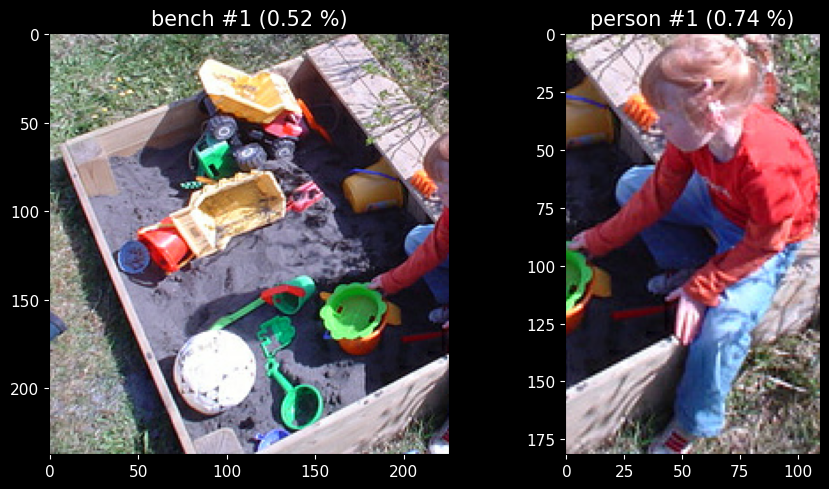

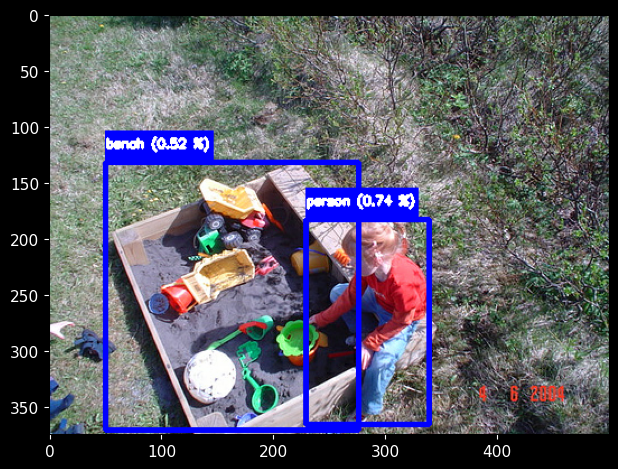

2 boxes found :
[0.25410342 0.12503432 0.35301238 0.4202131 ]
[0.18206769 0.14534527 0.3687734  0.90137666]


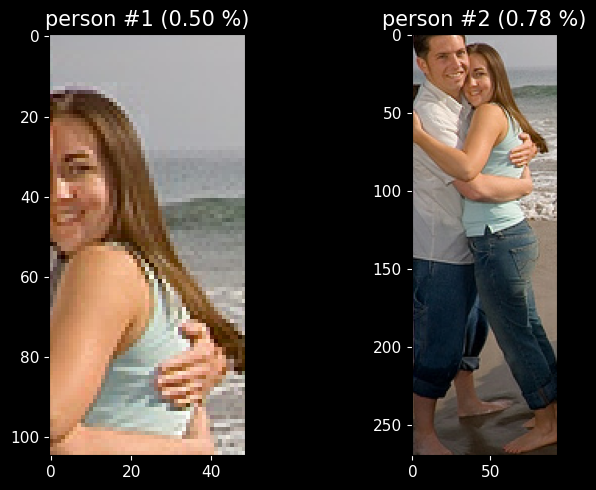

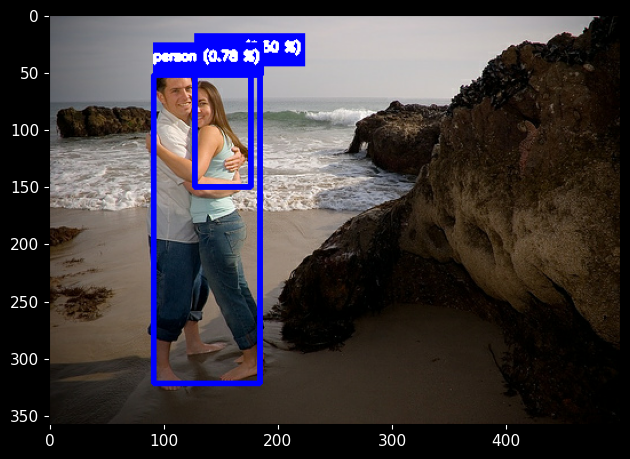

In [2]:
from utils.datasets import get_dataset
from models.detection import detect

#coco = get_dataset('coco')
voc = get_dataset('voc')

_ = detect(voc.sample(5, random_state = 0), model = 'yolo_coco', save = False, verbose = 3, color = 'blue')

## Text detection with EAST

The weights for EAST are not automatically downloaded : they are accessible via [this open-source project](https://github.com/SakuraRiven/EAST). To perform the weights transfer to the `keras` implementation, you have to put the `east_vgg16.pth` file in the `pretrained_models/pretrained_weights` folder, and have a working `pytorch` installation (GPU is not required). The weights will be automatically converterd, regardless of the `keras3` backend ;)

Note : the image comes from the `COCO val2017` folder.

In [3]:
from models.detection import EAST, detect

model = EAST(
    name = 'east', labels = 'text', input_size = (None, None, 3)
)

print(model)

Deserializing `model` from config
`model` successfully restored !
Loading `model` weights from pretrained_models/east/saving/ckpt-0000.weights.h5
EAST `east` initialized successfully !

========== east ==========
Model instance `model`
- Inputs 	: (None, None, None, 3)
- Outputs 	: (None, None, None, 6)
- Number of layers 	: 96
- Number of parameters 	: 15.099 Millions
- Model not compiled yet

Already trained on 0 epochs (0 steps)

- Image size : (None, None, 3)
- Resize config : {'antialias': True}
- Normalization schema : east
- Labels (n = 1) : ['text']



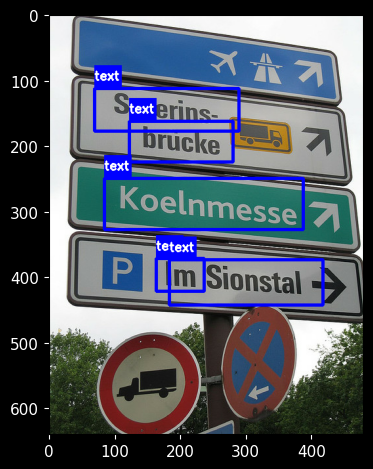

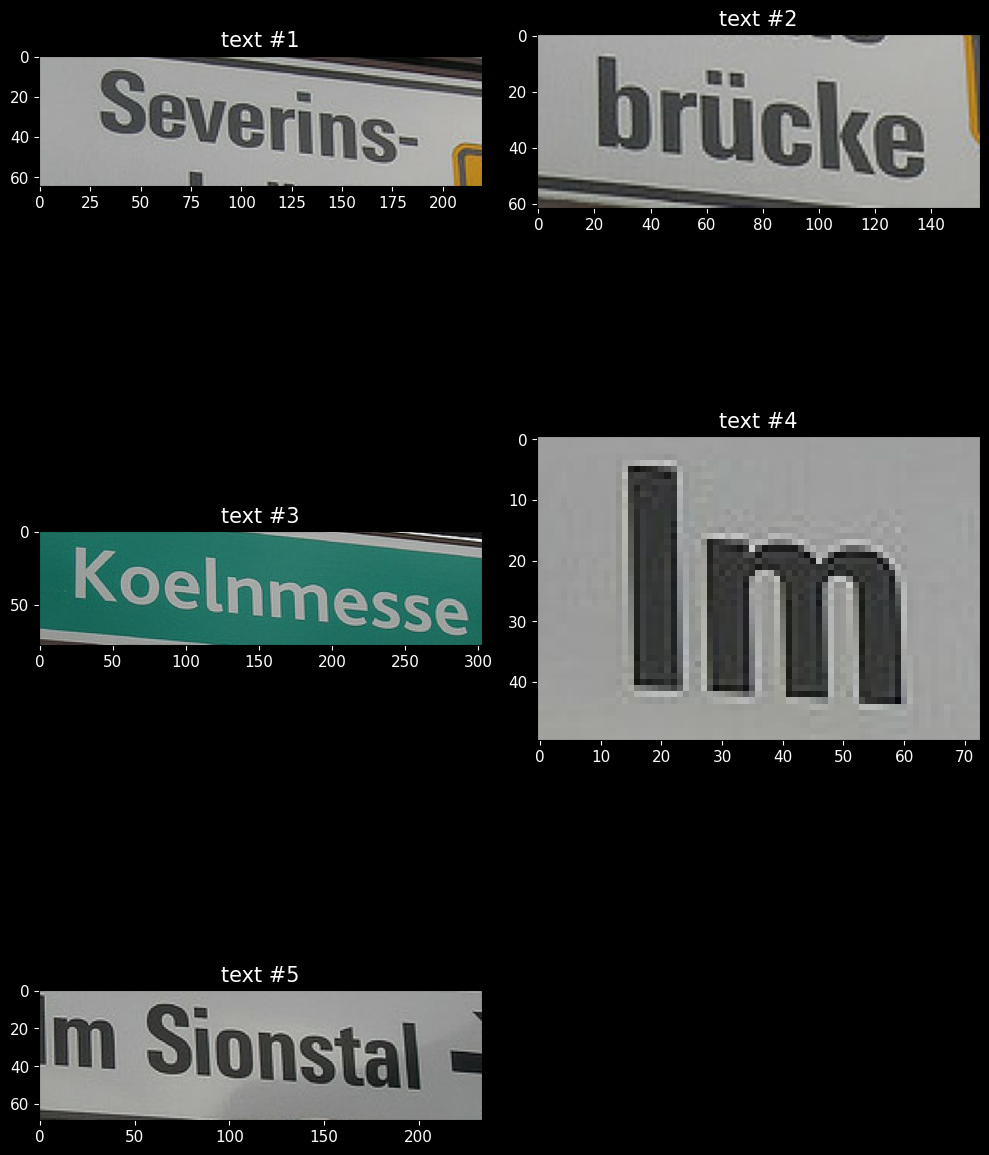

In [2]:
from models.detection import detect

_ = detect('text.jpg', save = False, model = 'east', verbose = 2, color = 'b', merge_threshold = 0.3, nms_threshold = 0.2)

### Non-Maximal Suppression (NMS) vs Locality-Aware NMS

The `EAST` model functions as a segmentation model, predicting values (confidence score + text box position/orientation) for each pixel in the image. Since multiple pixels naturally belong to the same text box, it's essential to filter out duplicate detections. 

Standard NMS algorithm addresses this by filtering out boxes with an Intersection over Union (IoU) above the `nms_threshold` (typically 0.2) compared to a reference box. This sequential process keeps only one box (the *reference* box) for each text instance. However, this approach has limitations - the selected box may not always cover the entire text region (especially for larger texts) or may not be the optimal representation.

To overcome these limitations, the `EAST` paper authors developed Locality-Aware NMS (LANMS). This advanced algorithm merges overlapping boxes to create a resulting box that maximizes coverage of the text area. By combining information from multiple detections, LANMS produces more accurate and comprehensive text boundary representations.

This cell demonstrates a step-by-step NMS filtering of the `EAST` output, comparing both NMS and LANMS filtering strategies. You can modify the filtering approach in the `detect` method by changing the `nms_method` argument.

{'boxes': (829, 4), 'scores': (829,), 'format': ()}
(5, 4)
(5, 4)


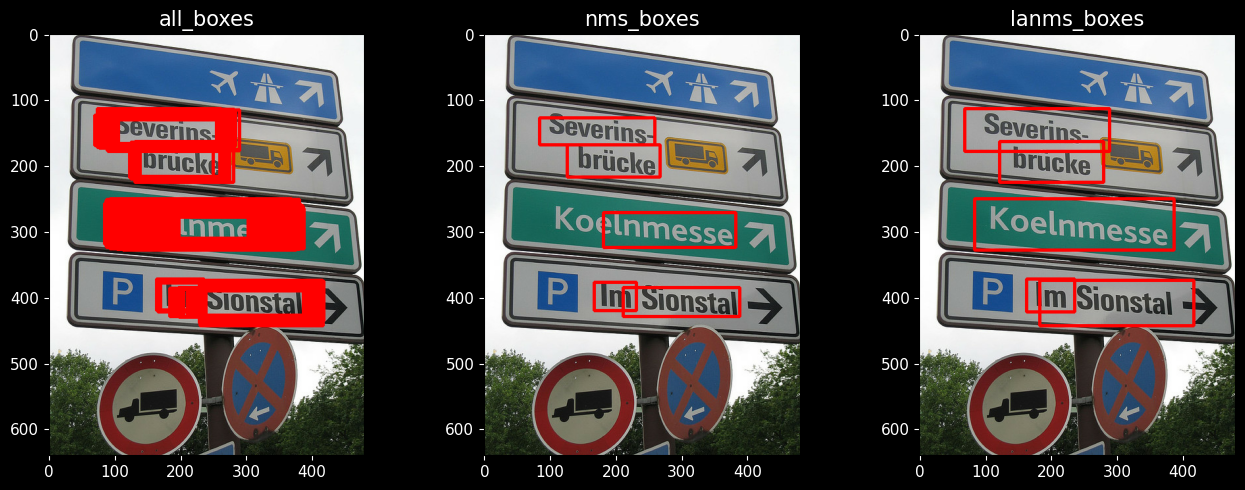

In [8]:
import keras
import numpy as np

from utils import plot_multiple
from utils.image import nms
from models import get_pretrained

model = get_pretrained('east')

inp = model.get_input('text.jpg')

out = model(inp[None], training = False)

boxes = model.decode_output(out[0], nms_threshold = 1., inputs = inp[None])
boxes = convert_box_format(boxes, 'xyxy')
all_boxes = boxes
print(keras.tree.map_structure(lambda t: tuple(t.shape) if hasattr(t, 'shape') else (), boxes))

nms_boxes = nms(boxes, method = 'tensorflow', nms_threshold = 0.2)
nms_boxes = nms_boxes[0][nms_boxes[2]]
print(keras.tree.map_structure(lambda t: tuple(t.shape) if hasattr(t, 'shape') else (), nms_boxes))

lanms_boxes = nms(boxes['boxes'], method = 'lanms', merge_threshold = 0.3, nms_threshold = .2, run_eagerly = True, source = 'xyxy')
lanms_boxes = lanms_boxes[0][lanms_boxes[2]]
print(keras.tree.map_structure(lambda t: tuple(t.shape) if hasattr(t, 'shape') else (), lanms_boxes))

plot_multiple(
    all_boxes   = draw_boxes('text.jpg', boxes, color = 'r', source = 'xyxy'),
    nms_boxes   = draw_boxes('text.jpg', nms_boxes, color = 'r', source = 'xyxy'),
    lanms_boxes = draw_boxes('text.jpg', lanms_boxes, color = 'r', source = 'xyxy'),
    plot_type = 'imshow', ncols = 3
)
#plot(draw_boxes('../detection/text.jpg', boxes, source = 'xyxy', color = 'b'), figsize = (10, 10))
#show_boxes('../detection/text.jpg', boxes, source = 'xyxy')